2023-12-13 16:03:00.433632: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 16:03:00.484620: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 16:03:00.484671: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 16:03:00.484697: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 16:03:00.492525: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 16:03:00.493109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

,Tanggal,qty,Jumlah
Tanggal,,,
2016-01-01,2016-01-01,836,5600932.0
2016-01-02,2016-01-02,964,6460341.0
2016-01-03,2016-01-03,1900,12727990.0
2016-01-04,2016-01-04,1944,13023929.0
2016-01-05,2016-01-05,7653,43238490.0
...,...,...,...
2021-12-27,2021-12-27,3892,20043800.0
2021-12-28,2021-12-28,3848,19817200.0
2021-12-29,2021-12-29,3915,20162250.0


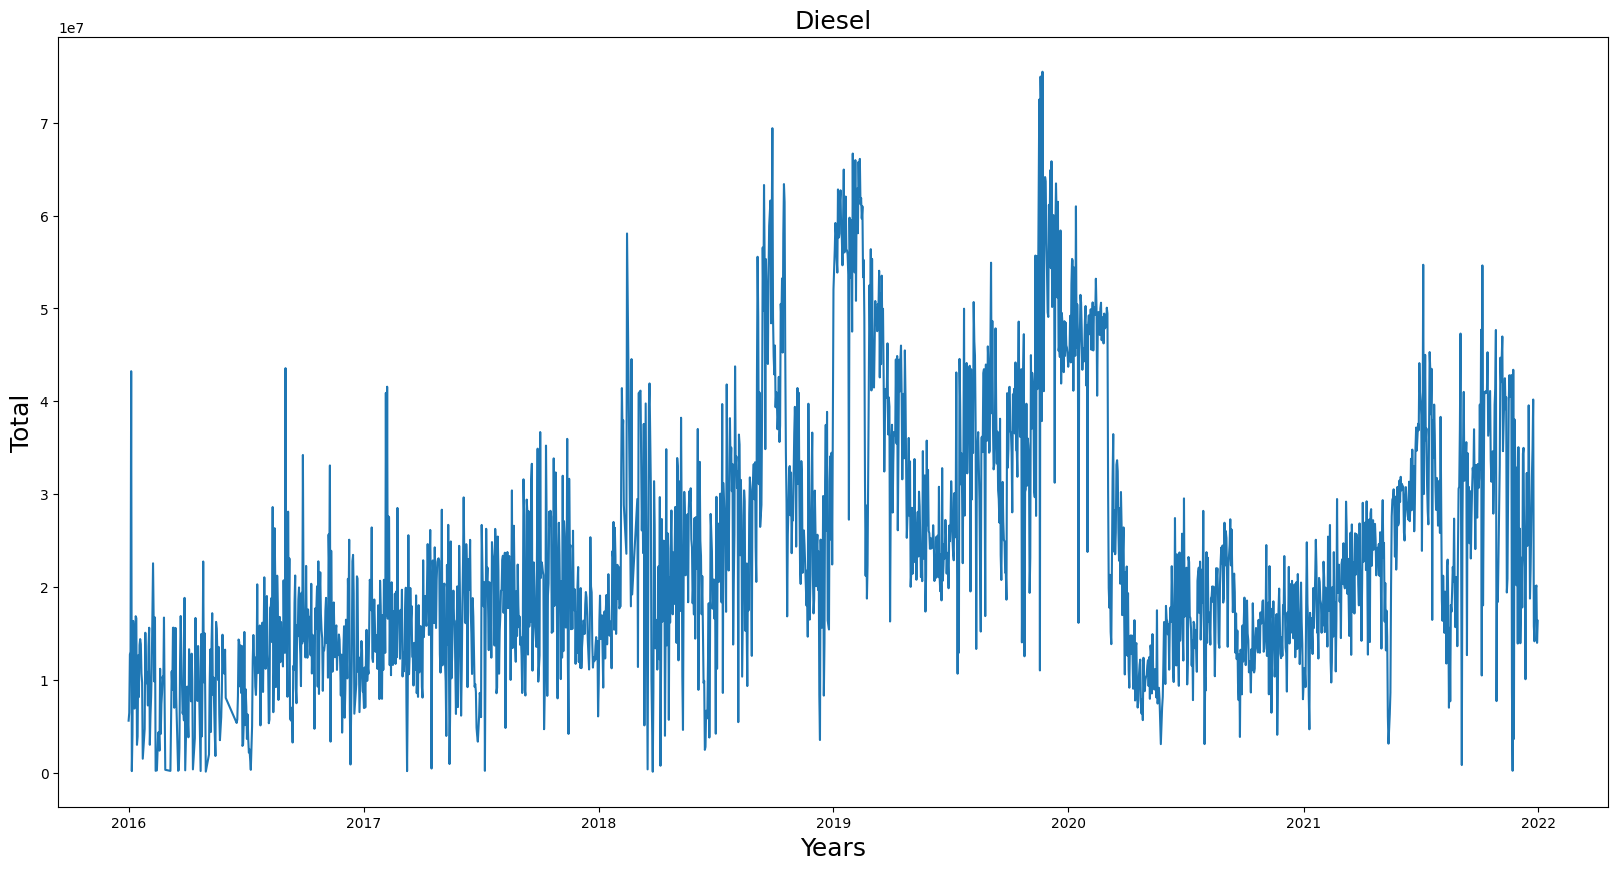

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =20,10

# Load dataset
df = pd.read_csv('Diesel.csv')

# Set Tanggal as datetime index
df['Tanggal'] = pd.to_datetime(df.Tanggal, format='%Y-%m-%d')
df.index = df['Tanggal']

# Plot dataset
plt.figure(figsize=(20, 10))
plt.plot(df['Jumlah'], label='History Harga Penutup')
plt.title('Diesel', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.xlabel('Years', fontsize=18)

df

In [2]:
# normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Tanggal', 'Jumlah'])
for i in range(0, len(df)):
    new_data['Tanggal'][i] = data['Tanggal'][i]
    new_data['Jumlah'][i] = data['Jumlah'][i]

new_data.index = new_data['Tanggal']
new_data.drop('Tanggal', axis=1, inplace=True)

dataset = new_data.values

# Train-test split
train, valid = train_test_split(dataset, test_size=0.2, shuffle=False, random_state=0)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Prepare data for training
x_train, y_train = [], []
for i in range(30, len(train)):
    x_train.append(scaled_data[i - 30:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train)

/tmp/ipykernel_71142/1034151565.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Tanggal'][i] = data['Tanggal'][i]
/tmp/ipykernel_71142/1034151565.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Jumlah'][i] = data['Jumlah'][i]


[[[0.07292572]
  [0.0843251 ]
  [0.16746051]
  ...
  [0.14191765]
  [0.09466098]
  [0.17901282]]

 [[0.0843251 ]
  [0.16746051]
  [0.1713859 ]
  ...
  [0.09466098]
  [0.17901282]
  [0.20570819]]

 [[0.16746051]
  [0.1713859 ]
  [0.57215816]
  ...
  [0.17901282]
  [0.20570819]
  [0.03847263]]

 ...

 [[0.20889405]
  [0.1573878 ]
  [0.21490547]
  ...
  [0.16995696]
  [0.22761118]
  [0.21162648]]

 [[0.1573878 ]
  [0.21490547]
  [0.24871917]
  ...
  [0.22761118]
  [0.21162648]
  [0.21476877]]

 [[0.21490547]
  [0.24871917]
  [0.20008197]
  ...
  [0.21162648]
  [0.21476877]
  [0.24318601]]]


In [17]:
import time
mulai = time.time()
# Define the number of epochs to experiment with
epochs_list = [5,10]
epochs =[]
# Run experiments
for epochs in epochs_list:
    print(f"\nTraining with {epochs} epochs...\n")

# Build LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=epochs, batch_size=3, verbose=1, validation_data=(x_train, y_train))

akhir = time.time()
waktu_detik = akhir - mulai
waktu_menit = "{:.2f}".format(waktu_detik / 60)





Training with 5 epochs...


Training with 10 epochs...

Epoch 1/10
547/547 [==============================] - 17s 28ms/step - loss: 0.0145 - val_loss: 0.0125
Epoch 2/10
547/547 [==============================] - 16s 28ms/step - loss: 0.0125 - val_loss: 0.0128
Epoch 3/10
547/547 [==============================] - 15s 28ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 4/10
547/547 [==============================] - 15s 27ms/step - loss: 0.0122 - val_loss: 0.0106
Epoch 5/10
547/547 [==============================] - 16s 30ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 6/10
547/547 [==============================] - 16s 28ms/step - loss: 0.0115 - val_loss: 0.0118
Epoch 7/10
547/547 [==============================] - 15s 27ms/step - loss: 0.0115 - val_loss: 0.0111
Epoch 8/10
547/547 [==============================] - 18s 34ms/step - loss: 0.0111 - val_loss: 0.0106
Epoch 9/10
547/547 [==============================] - 18s 33ms/step - loss: 0.0112 - val_loss: 0.0133
Epoch 10/10
547/547 [====

In [18]:
# Prepare data for testing
inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(30, inputs.shape[0]):
    x_test.append(inputs[i - 30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# ...

# # Predictions
# closing_price_30 = []
# closing_price_60 = []
# closing_price_180 = []
# closing_price_365 = []

# for i in range(30):
#     next_day_prediction = model.predict(x_test)
#     closing_price_30.append(next_day_prediction[0, 0])
#     x_test = np.roll(x_test, -1)
#     x_test[-1, -1] = next_day_prediction[0, 0]

# for i in range(30, 60):
#     next_day_prediction = model.predict(x_test)
#     closing_price_60.append(next_day_prediction[0, 0])
#     x_test = np.roll(x_test, -1)
#     x_test[-1, -1] = next_day_prediction[0, 0]

# for i in range(60, 180):
#     next_day_prediction = model.predict(x_test)
#     closing_price_180.append(next_day_prediction[0, 0])
#     x_test = np.roll(x_test, -1)
#     x_test[-1, -1] = next_day_prediction[0, 0]

# for i in range(180, 365):
#     next_day_prediction = model.predict(x_test)
#     closing_price_365.append(next_day_prediction[0, 0])
#     x_test = np.roll(x_test, -1)
#     x_test[-1, -1] = next_day_prediction[0, 0]

# Inverse transform to get the denormalized values
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

# closing_price_30 = scaler.inverse_transform(np.array(closing_price_30).reshape(-1, 1))
# closing_price_60 = scaler.inverse_transform(np.array(closing_price_60).reshape(-1, 1))
# closing_price_180 = scaler.inverse_transform(np.array(closing_price_180).reshape(-1, 1))
# closing_price_365 = scaler.inverse_transform(np.array(closing_price_365).reshape(-1, 1))

# Evaluate RMSE and MAPE
y_true = new_data['Jumlah'][-len(valid):].values

rmse = np.sqrt(np.mean((valid - closing_price)**2))
mape = np.mean(np.abs((valid - closing_price) / valid)) * 100

# rmse_30 = sqrt(mean_squared_error(y_true[:30], closing_price_30))
# mape_30 = np.mean(np.abs((y_true[:30] - closing_price_30.flatten()) / y_true[:30])) * 100

# rmse_60 = sqrt(mean_squared_error(y_true[30:60], closing_price_60))
# mape_60 = np.mean(np.abs((y_true[30:60] - closing_price_60.flatten()) / y_true[30:60])) * 100

# rmse_180 = sqrt(mean_squared_error(y_true[60:180], closing_price_180))
# mape_180 = np.mean(np.abs((y_true[60:180] - closing_price_180.flatten()) / y_true[60:180])) * 100

# rmse_365 = sqrt(mean_squared_error(y_true[180:365], closing_price_365))
# mape_365 = np.mean(np.abs((y_true[180:365] - closing_price_365.flatten()) / y_true[180:365])) * 100

# # Print RMSE and MAPE
# print(f"RMSE for 30 days: {rmse_30:.2f}")
# print(f"MAPE for 30 days: {mape_30:.2f}%")

# print(f"RMSE for 60 days: {rmse_60:.2f}")
# print(f"MAPE for 60 days: {mape_60:.2f}%")

# print(f"RMSE for 180 days: {rmse_180:.2f}")
# print(f"MAPE for 180 days: {mape_180:.2f}%")

# print(f"RMSE for 365 days: {rmse_365:.2f}")
# print(f"MAPE for 365 days: {mape_365:.2f}")


14/14 [==============================] - 0s 16ms/step


RMSE : 5148274.08
MAPE : 36.96%
Run time for 10 epochs: 2.79 min


/tmp/ipykernel_71142/2737635596.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


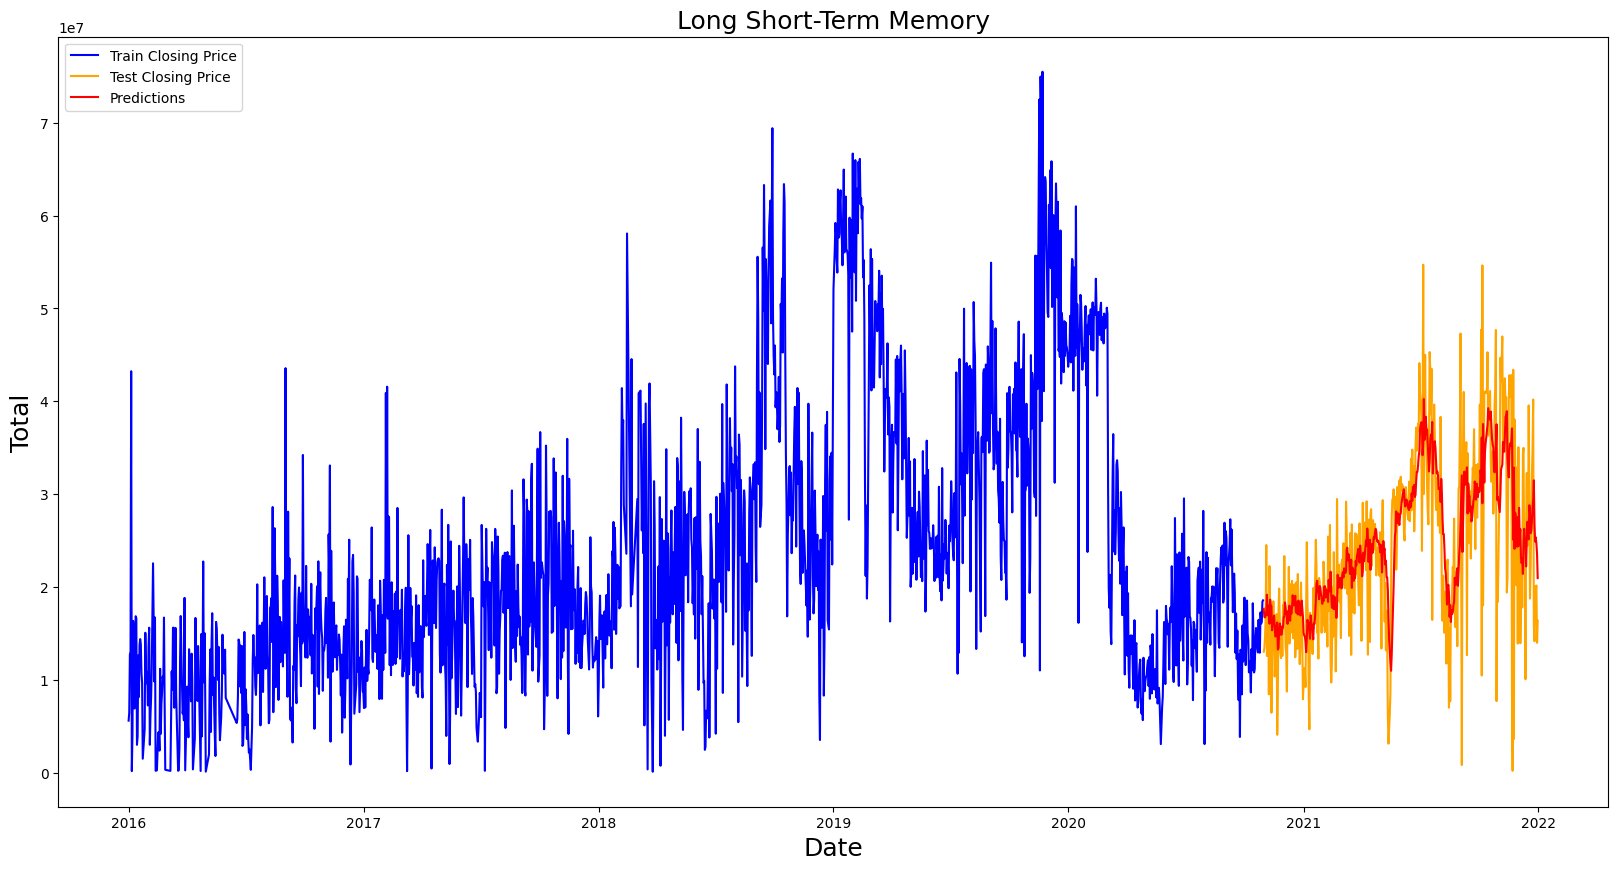

In [25]:
# Split data into train and valid
train_size = int(len(new_data) * 0.8)
train, valid = new_data[:train_size], new_data[train_size:]

print(f'RMSE : {rmse:.2f}')
print(f'MAPE : {mape:.2f}%')
print(f"Run time for {epochs} epochs: {waktu_menit} min")

# Plot training and validation data
valid['Predictions'] = closing_price
plt.title('Long Short-Term Memory', fontsize=18)
plt.plot(train['Jumlah'], label='Train Closing Price', color='blue')
plt.plot(valid['Jumlah'], label='Test Closing Price', color='orange')
plt.plot(valid['Predictions'], label='Predictions',color='red')
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.show()


# # Plot prediction
# plt.plot(valid.index[:30], closing_price_30, label=f'Predictions {epochs} Epochs 30 Days')
# plt.plot(valid.index[30:60], closing_price_60, label=f'Predictions {epochs} Epochs 60 Days')
# plt.plot(valid.index[60:180], closing_price_180, label=f'Predictions {epochs} Epochs 180 Days')
# plt.plot(valid.index[180:365], closing_price_365, label=f'Predictions {epochs} Epochs 365 Days')




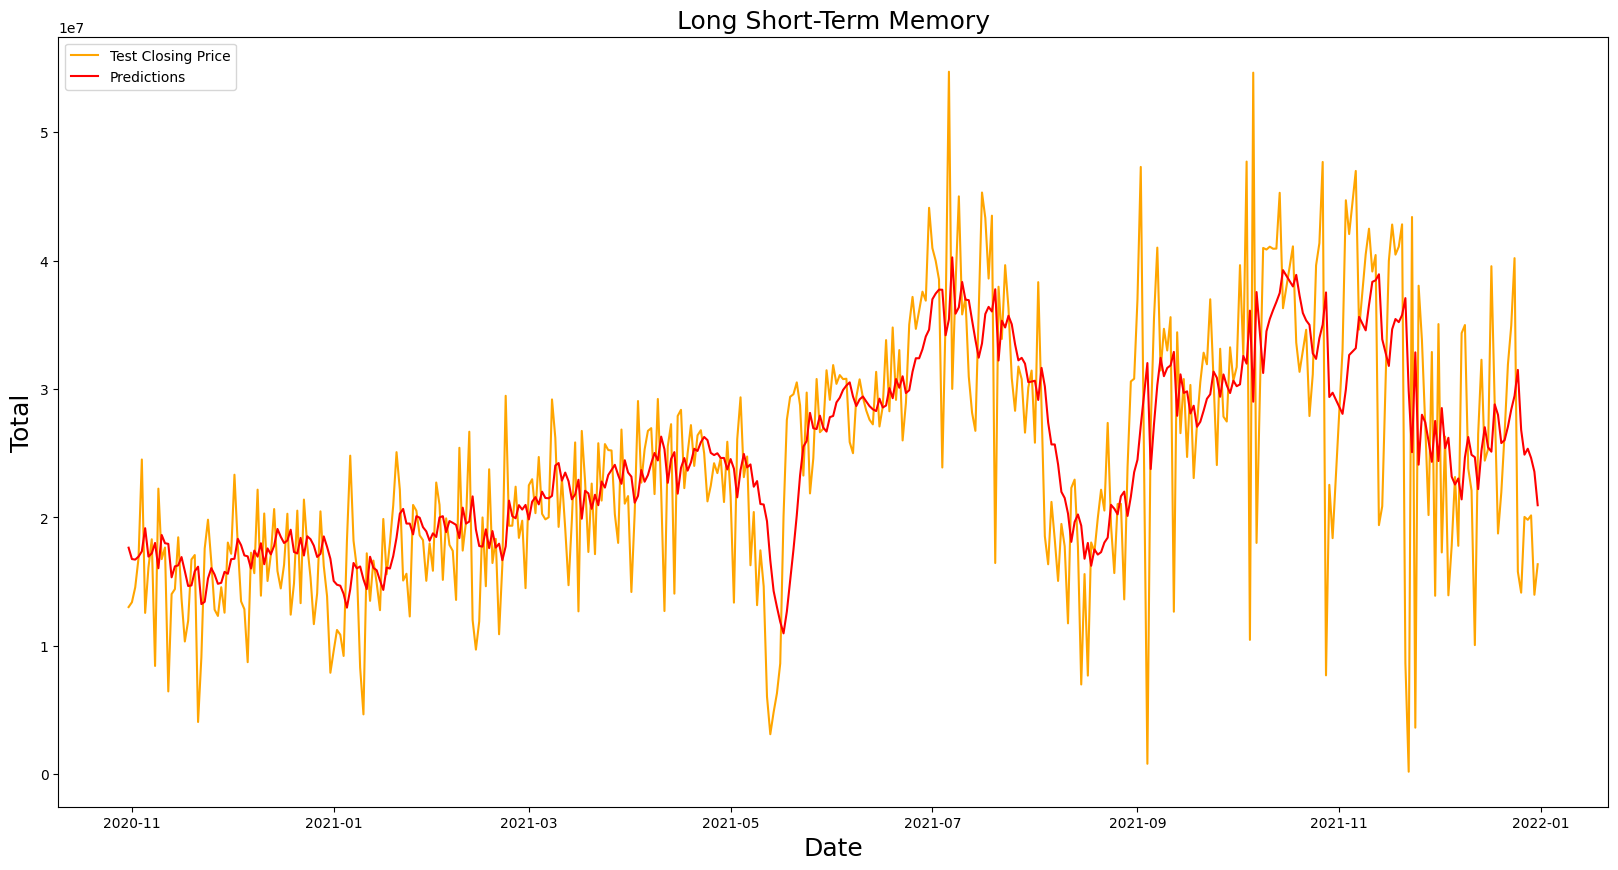

In [26]:
plt.title('Long Short-Term Memory', fontsize=18)
plt.plot(valid['Jumlah'], label='Test Closing Price', color='orange')
plt.plot(valid['Predictions'], label='Predictions',color='red')
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.show()